## Practical Work 3

For this practical work, the student will have to develop a Python program that is able to implement the accelerated gradient descent methods <b>(Momentum and NAG)</b> in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score
from numpy import linalg as LA

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -1, b = 2)</b>


In [2]:
x = np.linspace(0, 20,50)
y = -1 * x + 2

In [3]:
print(x)
print(y)
print(x.size)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
[  2.           1.59183673   1.18367347   0.7755102    0.36734694
  -0.04081633  -0.44897959  -0.85714286  -1.26530612  -1.67346939
  -2.08163265  -2.48979592  -2.89795918  -3.30612245  -3.71428571
  -4.12244898  -4.53061224  -4.93877551  -5.34693878  -5.75510204
  -6.16326531  -6.57142857  -6.97959184  -7.3877551   -7.79591837
  -8.20408163  -8.6122449   -9.02040816  -9.42857143  -9.8367

#### Plot your data points. 

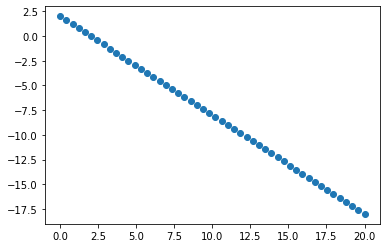

In [4]:
plt.scatter(x,y)

#### Use your final version of the implemented Batch GD algorithm for single variable to find the best line filt of the given data.
#### Coose the suitable number of iterations, learning rate, and stop criteria.
#### Calculate r2 score. Shouldn't below 0.9
#### Plot the required curves (loss-epochs, loss-theta0, loss-theta1, all fitted lines per epoch (single graph) , best fit line)

In [334]:
def gradient_descent(x,y,learning_rate,max_iter):
        final_thetas = []
        cost_func = [];
        theta0_val = [];
        theta1_val = [];
        hypothesis_output = [];
        theta_0 = 0
        theta_1 = 0
        i=1
        while i <= max_iter :
            #step 2
            output_hx = theta_0 + theta_1 * x
            hypothesis_output.append(output_hx)
            #step 3
            j_theta = 0
            j_theta = (1/(2*output_hx.size))*((output_hx - y)**2).sum()
            cost_func.append(j_theta)
            theta0_val.append(theta_0)
            theta1_val.append(theta_1)
            #step 4
            #theta 0 gradient
            theta_0_gradient = 0
            theta_0_gradient = (1/(output_hx.size)) * (output_hx - y).sum()
            #theta 1 gradient
            theta_1_gradient = 0
            theta_1_gradient = (1/(output_hx.size)) * ( (output_hx - y) * x ).sum()
            #step 5
            #next theta 0 => update
            theta_0 = theta_0 - learning_rate * theta_0_gradient
            #next theta 1 => update
            theta_1 = theta_1 - learning_rate * theta_1_gradient
            gradient_vector = np.array(theta_0_gradient,theta_1_gradient)
            gradient_vector_norm = LA.norm(gradient_vector)
            if i == max_iter or gradient_vector_norm<=0.0001:#stop criteria
                final_theta_0 = theta_0
                final_theta_1 = theta_1
                final_thetas.append(final_theta_0)
                final_thetas.append(final_theta_1)
                return final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output
            i+=1

In [335]:
final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output = gradient_descent(x,y,0.001,40)
print("No of iterations: " , len(cost_func))

No of iterations:  40


In [336]:
print(r2_score(y, hypothesis_output[-1]))

0.9689953316962127


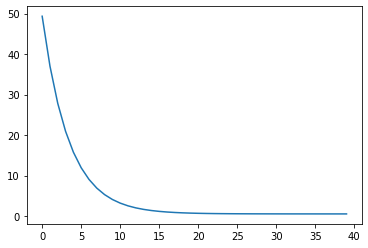

In [337]:
plt.plot(range(len(cost_func)),cost_func)

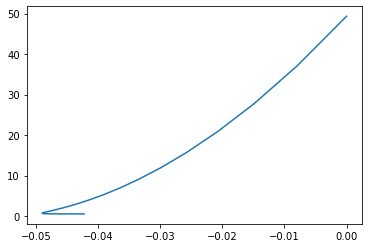

In [338]:
plt.plot(theta0_val,cost_func)

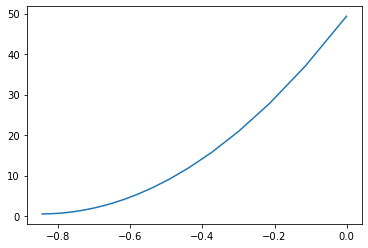

In [339]:
plt.plot(theta1_val,cost_func)

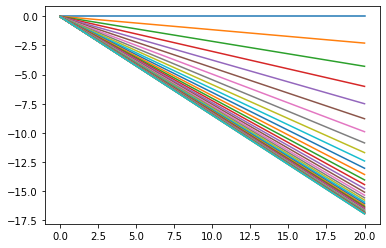

In [340]:
for i in range(len(theta0_val)):
    plt.plot(x,hypothesis_output[i])

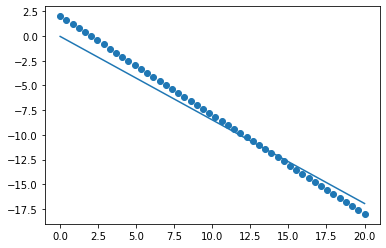

In [341]:
plt.scatter(x,y)
plt.plot(x,hypothesis_output[-1])

### Update your Batch GD for one variable  implementation to be Momentum-Based GD and check your results

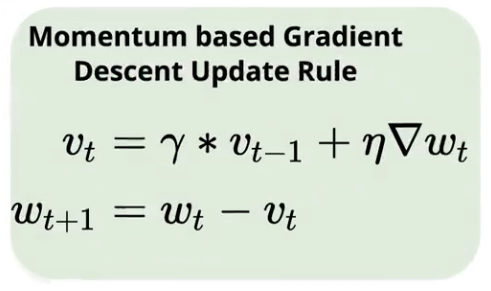

#### γ takes values between 0 and 1.
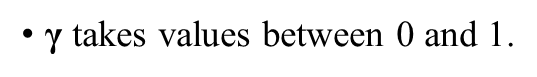

In [352]:
def momentum_gradient_descent(x,y,learning_rate,max_iter,gamma):
        final_thetas = []
        cost_func = [];
        theta0_val = [];
        theta1_val = [];
        hypothesis_output = [];
        theta_0 = 0
        theta_1 = 0
        vt_zero = 0
        vt_one = 0
        i=1
        while i <= max_iter :
            #step 2
            output_hx = theta_0 + theta_1 * x
            hypothesis_output.append(output_hx)
            #step 3
            j_theta = 0
            j_theta = (1/(2*output_hx.size))*((output_hx - y)**2).sum()
            cost_func.append(j_theta)
            theta0_val.append(theta_0)
            theta1_val.append(theta_1)
            #step 4
            #theta 0 gradient
            theta_0_gradient = 0
            theta_0_gradient = (1/(output_hx.size)) * (output_hx - y).sum()
            #theta 1 gradient
            theta_1_gradient = 0
            theta_1_gradient = (1/(output_hx.size)) * ( (output_hx - y) * x ).sum()
            #step 6
            vt_zero = gamma * vt_zero + learning_rate * theta_0_gradient
            vt_one = gamma * vt_one + learning_rate * theta_1_gradient
            #next theta 0 => update
            theta_0 = theta_0 - vt_zero
            #next theta 1 => update
            theta_1 = theta_1 - vt_one
            gradient_vector = np.array(theta_0_gradient,theta_1_gradient)
            gradient_vector_norm = LA.norm(gradient_vector)
            if i == max_iter or gradient_vector_norm<=0.0001:#stop criteria
                final_theta_0 = theta_0
                final_theta_1 = theta_1
                final_thetas.append(final_theta_0)
                final_thetas.append(final_theta_1)
                return final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output
            i+=1

In [353]:
final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output = momentum_gradient_descent(x,y,0.0001,1000,0.99)
print("No of iterations: " , len(cost_func))

No of iterations:  798


In [354]:
print(r2_score(y, hypothesis_output[-1]))

0.9996974108087977


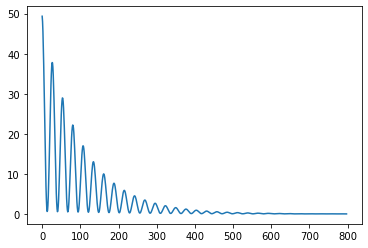

In [355]:
plt.plot(range(len(cost_func)),cost_func)

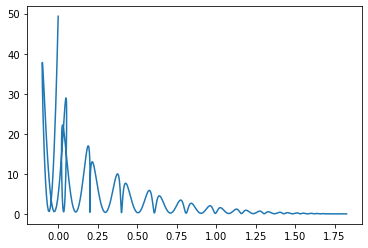

In [356]:
plt.plot(theta0_val,cost_func)

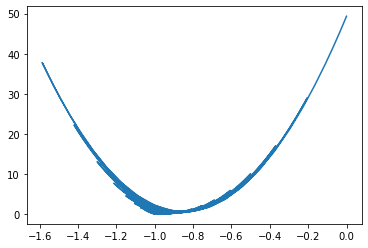

In [357]:
plt.plot(theta1_val,cost_func)

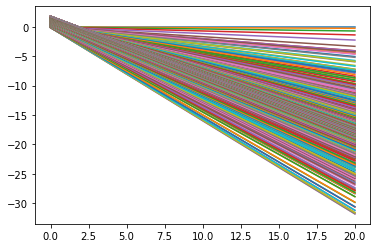

In [358]:
for i in range(len(theta0_val)):
    plt.plot(x,hypothesis_output[i])

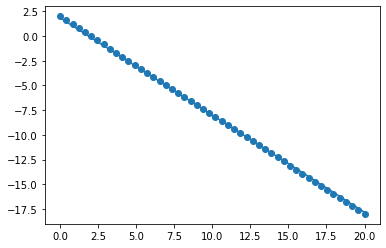

In [359]:
plt.scatter(x,y)
plt.plot(x,hypothesis_output[-1])

#### Try another values of momentum term and check your reults.
#### Try very large values close to one and very small values close to zero. 
#### Try momentum = 0

In [360]:
final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output = momentum_gradient_descent(x,y,0.001,40,0)
print("No of iterations: " , len(cost_func))

No of iterations:  40


In [361]:
print(r2_score(y, hypothesis_output[-1]))

0.9689953316962127


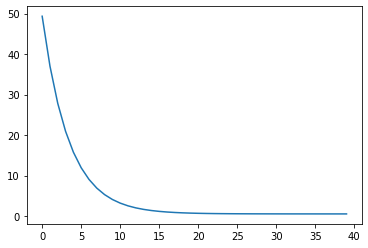

In [362]:
plt.plot(range(len(cost_func)),cost_func)

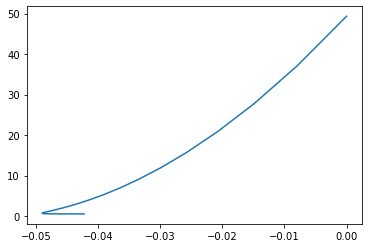

In [363]:
plt.plot(theta0_val,cost_func)

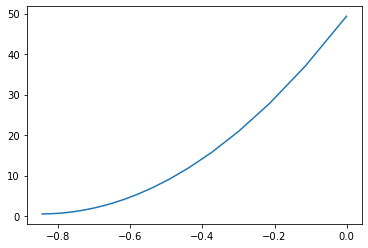

In [364]:
plt.plot(theta1_val,cost_func)

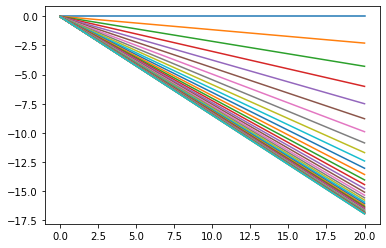

In [365]:
for i in range(len(theta0_val)):
    plt.plot(x,hypothesis_output[i])

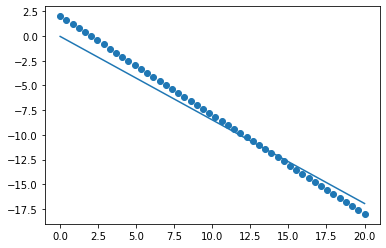

In [366]:
plt.scatter(x,y)
plt.plot(x,hypothesis_output[-1])

In [426]:
final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output = momentum_gradient_descent(x,y,0.002,100,0.9)
print("No of iterations: " , len(cost_func))

No of iterations:  100


In [427]:
print(r2_score(y, hypothesis_output[-1]))

0.9878586547004675


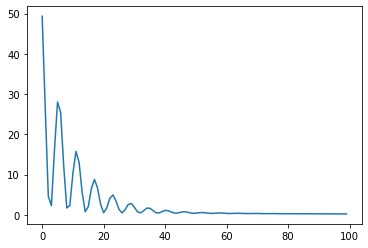

In [428]:
plt.plot(range(len(cost_func)),cost_func)

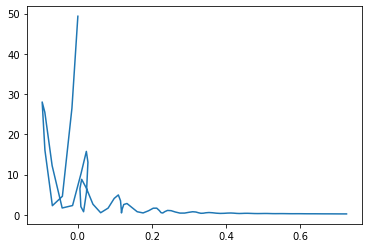

In [429]:
plt.plot(theta0_val,cost_func)

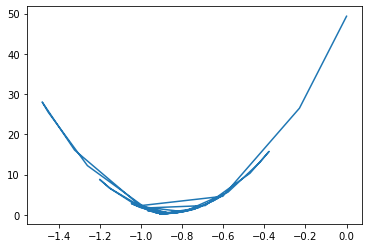

In [430]:
plt.plot(theta1_val,cost_func)

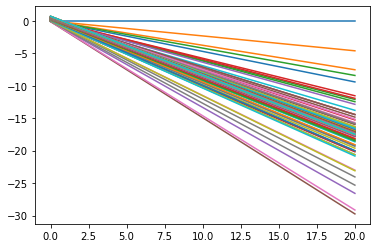

In [431]:
for i in range(len(theta0_val)):
    plt.plot(x,hypothesis_output[i])

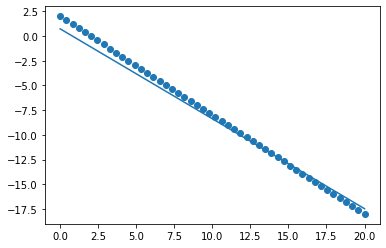

In [432]:
plt.scatter(x,y)
plt.plot(x,hypothesis_output[-1])

In [382]:
final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output = momentum_gradient_descent(x,y,0.001,20,0.2)
print("No of iterations: " , len(cost_func))

No of iterations:  20


In [383]:
print(r2_score(y, hypothesis_output[-1]))

0.9669763485701527


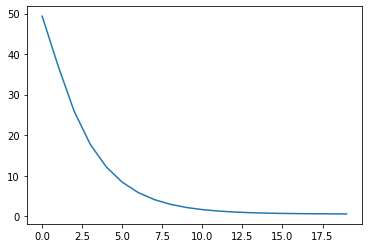

In [384]:
plt.plot(range(len(cost_func)),cost_func)

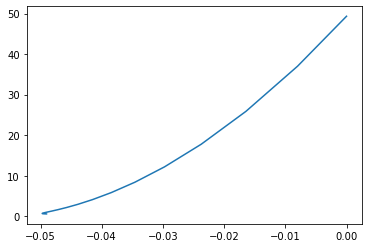

In [385]:
plt.plot(theta0_val,cost_func)

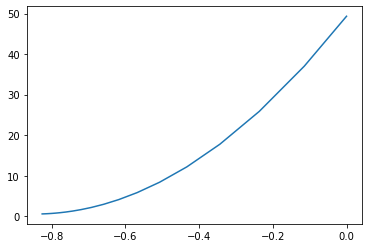

In [386]:
plt.plot(theta1_val,cost_func)

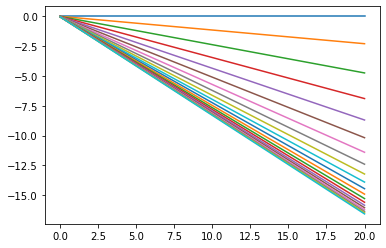

In [387]:
for i in range(len(theta0_val)):
    plt.plot(x,hypothesis_output[i])

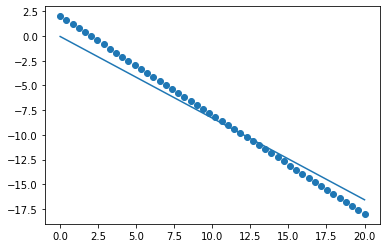

In [388]:
plt.scatter(x,y)
plt.plot(x,hypothesis_output[-1])

### Update your Batch GD for one variable  implementation to be NAG and check your results

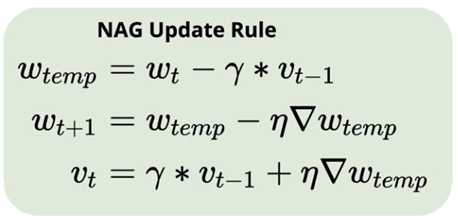

In [389]:
def NAG_gradient_descent(x,y,learning_rate,max_iter,gamma):
        final_thetas = []
        cost_func = [];
        theta0_val = [];
        theta1_val = [];
        hypothesis_output = [];
        theta_0 = 0
        theta_1 = 0
        vt_zero = 0
        vt_one = 0
        i=1
        while i <= max_iter :
            output_hx = theta_0 + theta_1 * x
            hypothesis_output.append(output_hx)
            #cost function
            j_theta = 0
            j_theta = (1/(2*output_hx.size))*((output_hx - y)**2).sum()
            cost_func.append(j_theta)
            theta0_val.append(theta_0)
            theta1_val.append(theta_1)
            #step 4
            #theta 0 gradient & theta 1 gradient
            theta_0_gradient = 0
            theta_0_gradient = (1/(output_hx.size)) * (output_hx - y).sum()
            theta_1_gradient = 0
            theta_1_gradient = (1/(output_hx.size)) * ( (output_hx - y) * x ).sum()
            #W temp calc
            theta_0_temp = theta_0 - gamma * vt_zero
            theta_1_temp = theta_1 - gamma * vt_one
            #step 2
            output_hx_temp = theta_0_temp + theta_1_temp * x
            #theta 0 temp gradient
            theta_0_temp_gradient = 0
            theta_0_temp_gradient = (1/(output_hx_temp.size)) * (output_hx_temp - y).sum()
            #theta 1 gradient
            theta_1_temp_gradient = 0
            theta_1_temp_gradient = (1/(output_hx_temp.size)) * ( (output_hx_temp - y) * x ).sum()
            #next theta 0 => update
            theta_0 = theta_0 - learning_rate * theta_0_temp_gradient
            #next theta 1 => update
            theta_1 = theta_1 - learning_rate * theta_1_temp_gradient
            #next vt
            vt_zero = gamma * vt_zero + learning_rate * theta_0_temp_gradient
            vt_one = gamma * vt_one + learning_rate * theta_1_temp_gradient
            
            gradient_vector = np.array(theta_0_gradient,theta_1_gradient)
            gradient_vector_norm = LA.norm(gradient_vector)
            
            if i == max_iter or gradient_vector_norm<=0.0001:#stop criteria
                final_theta_0 = theta_0
                final_theta_1 = theta_1
                final_thetas.append(final_theta_0)
                final_thetas.append(final_theta_1)
                return final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output
            i+=1

In [390]:
final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output = NAG_gradient_descent(x,y,0.001,80,0.9)
print("No of iterations: " , len(cost_func))

No of iterations:  80


In [391]:
print(r2_score(y, hypothesis_output[-1]))

0.968494530997011


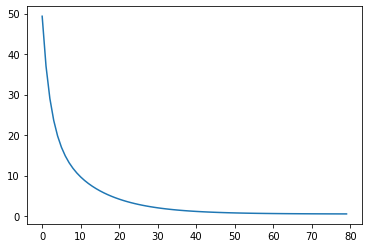

In [392]:
plt.plot(range(len(cost_func)),cost_func)

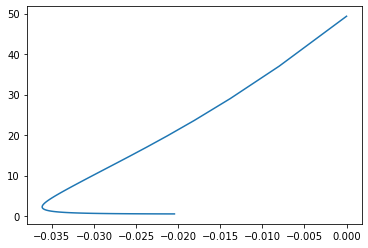

In [393]:
plt.plot(theta0_val,cost_func)

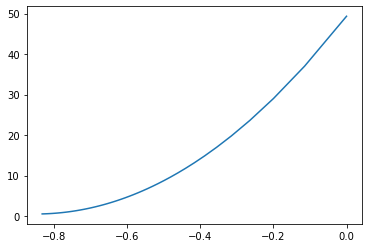

In [394]:
plt.plot(theta1_val,cost_func)

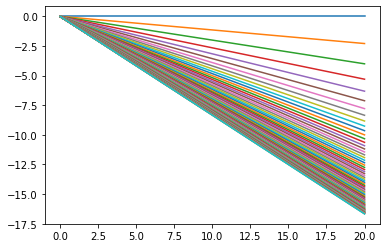

In [395]:
for i in range(len(theta0_val)):
    plt.plot(x,hypothesis_output[i])

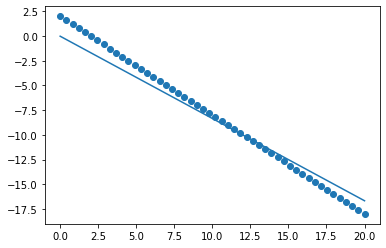

In [396]:
plt.scatter(x,y)
plt.plot(x,hypothesis_output[-1])

## Congratulations 
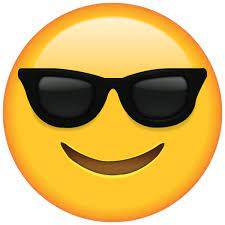